The objective of this notebook is
- Demonstrate training data and model components of linear regression model.
- Demonstrate how simple it is to implement ML components and algorithm.

> Note: We won't be using the `sklearn` library to train the model, those demonstrations are reserved for the MLP course. The focus is implementing these algorithms from scratch to realize what exactly is happening under the hood. 

Importing necessary libraries.

In [1]:
from IPython.display import display, Math, Latex
# This is imported for proper rendering of Latex in Notebook.

import numpy as np

# import for generating plots
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Quick Recap

1. Training data contains features and label that is real number.
2. Model or inference: $y = Xw$.

# Training Data

In [2]:
# Create a synthetic dataset of 100 examples with single feature and a label.
# For this construction use the following 3 parametres.
w0 = 4
w1 = 3
n = 100

X = 10 * np.random.rand(n,)

# Obtain y = 4 + 3*x + noise. Noise is randomly sampled.
y = w0 + w1 * X + np.random.randn(n,)

In [3]:
# (X,y) is the synthetic generated examples.
print(X.shape,y.shape)

(100,) (100,)


Let's divide the data into training and test set. We will set aside $20\%$ examples for testing.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [5]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(80,) (80,)
(20,) (20,)


Let's check the first few examples and labels.

In [6]:
X_train[:5]

array([2.25036503, 7.79520706, 5.49711861, 7.64820999, 8.60712206])

In [7]:
y_train[:5]

array([10.28073098, 27.3092987 , 20.27737581, 28.54830868, 29.63095566])

Let's visualize the training set.

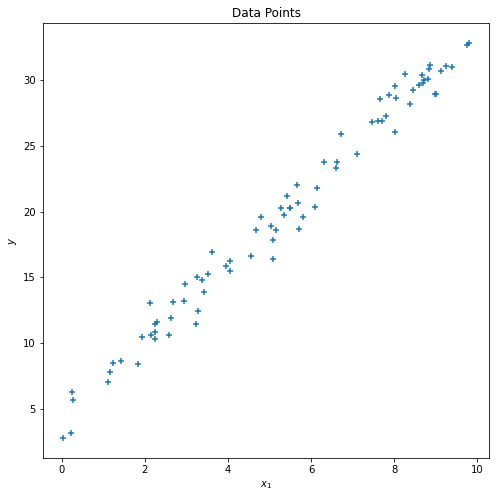

In [8]:
f = plt.figure(figsize=(8,8))

plt.scatter(X_train, y_train, marker = '+')
plt.title("Data Points")
plt.grid = True
plt.xlabel("$x_1$")
plt.ylabel("$y$")

plt.show()

We have a training set consisting a single feature. So, we will fit a simple linear regression model with one feature. It's of the form: $$y = w_0 + w_1 x_1$$

We add a special dummy feature $x_0$ and set it to $1$. We create a helper function to do that.

In [72]:
def add_dummy_feature(X):
    ''' Adds a dummy feature to the dataset.
    
    Args:
        X: Training dataset.
    
    Returns:
        Training dataset with the addition of dummy feature.
    '''
    return np.column_stack((np.ones(X.shape[0]), X))

Let's write a test case to test this function.

In [10]:
import unittest

class TestAddDummyFeature(unittest.TestCase):

    def test_add_dummy_feature(self):
        '''Test case function for add_dummy_feature'''
        train_matrix = np.array([[3,2,5],[9,4,7]])
        train_matrix_with_dummy_feature = add_dummy_feature(train_matrix)

        print(train_matrix,train_matrix_with_dummy_feature, sep = '\n')

        # test the shape
        self.assertEqual(train_matrix_with_dummy_feature.shape, (2,4))

        # and contents
        np.testing.assert_array_equal(
            train_matrix_with_dummy_feature,
            np.array([[1,3,2,5],[1,9,4,7]])
        )

unittest.main(argv=[''], defaultTest='TestAddDummyFeature', verbosity=2, exit=False)

test_add_dummy_feature (__main__.TestAddDummyFeature)
Test case function for add_dummy_feature ... 

[[3 2 5]
 [9 4 7]]
[[1. 3. 2. 5.]
 [1. 9. 4. 7.]]


ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [11]:
add_dummy_feature(np.array([[2,3],[5,4]]))

array([[1., 2., 3.],
       [1., 5., 4.]])

Let's process the synthetic training set to add the dummy feature.

In [12]:
print("Before adding the dummy feature:\n", X_train[:5])
print("\n")

X_train_with_dummy = add_dummy_feature(X_train)

print("Before adding the dummy feature:\n", X_train_with_dummy[:5,:])

Before adding the dummy feature:
 [2.25036503 7.79520706 5.49711861 7.64820999 8.60712206]


Before adding the dummy feature:
 [[1.         2.25036503]
 [1.         7.79520706]
 [1.         5.49711861]
 [1.         7.64820999]
 [1.         8.60712206]]


# Model Inference

The objective of this section is to implement model and inference component from linear regression model.

**Note**

- Model is parametrized by its weight vector.
- It is described by its mathematical form and weight vector.

### Implementation

The general vectorized form is as follows:
$$ y_{n \times (m+1)} = X_{n \times (m+1)} w_{(m+1) \times 1} $$

where

- $n$ is the number of examples in the dataset (train/validation/test)
- $m$ is the number of features
- $X$ is a feature matrix containing $(m+1)$ features (including the dummy feature) for $n$ samples along its rows
- $w$ is a weight vector containing $(m+1)$ weights, one for each feature
- $y$ is a label matrix containing labels for $n$ examples in a vector of shape $(n,)$

In [13]:
def predict(X, w):
    '''Prediction of output label for a given input.
    
    Args:
        X: Feature matrix of shape (n, m+1)
        w: Weight vector of shape (m+1, n)
    
    Returns:
        y: Predicted label vector of shape (n,)
    '''

    # Check to make sure that feature matrix and weight vectors are of compatible shapes.
    assert X.shape[-1]==w.shape[0], "X and w don't have compatible dimensions"
    return X @ w

# X @ w denotes the matrix multiplication operation for numpy arrays.

Let's test this function.

In [15]:
import unittest

class TestPredict(unittest.TestCase):

    def test_predict(self):
        '''Test case predict function of linear regression'''

        # set up
        train_matrix = np.array([[1,3,2,5],[1,9,4,7]]) # The dummy variable is already added
        weight_vector = np.array([1,1,1,1])
        expected_label_vector = np.array([11,21])

        # call
        predicted_label_vector = predict(train_matrix, weight_vector)

        print(expected_label_vector,predicted_label_vector, sep = '\n')
        
        # asserts
        
        # test the shape
        self.assertEqual(predicted_label_vector.shape, (2,))

        # and contents
        np.testing.assert_array_equal(
            expected_label_vector, predicted_label_vector)

unittest.main(argv=[''], defaultTest='TestPredict', verbosity=2, exit=False)

test_predict (__main__.TestPredict)
Test case predict function of linear regression ... 

[11 21]
[11 21]


ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


Since, we have not yet trained our model, let's use a random weight vector to get predictions from our model for a given dataset:

In [16]:
w = np.random.rand(2,)
w

array([0.33231069, 0.15178252])

In [17]:
y_hat = predict(X_train_with_dummy,w)

Let's compare the predicted values with the actual values:

In [18]:
print(y_hat[:5])
print(y_train[:5])

[0.67387678 1.5154869  1.16667723 1.49317531 1.63872141]
[10.28073098 27.3092987  20.27737581 28.54830868 29.63095566]


Since we used a random weight vector $w$ here, most of the predicted labels do not match the actual labels.

# Loss function implementation

The objective of this section is to implement the loss function of linear regression model from scratch.

### Quick Recap

1. Training data contains features and label that is real number.
2. Model or inference: $y = Xw$.
3. Loss function $J(w) = \frac{1}{2}(Xw - y)^T (Xw - y)$.

### Implementation

The loss function can be calculated as follows:
$$J(w) = \frac{1}{2}(Xw - y)^T (Xw - y)$$
where

- $X$ is a feature matrix containing $(m+1)$ features (including the dummy feature) for $n$ samples along its rows
- $w$ is a weight vector containing $(m+1)$ weights, one for each feature
- $y$ is a label matrix containing labels for $n$ examples in a vector of shape $(n,)$

In [29]:
def loss(X,y, w):
    '''Calculate loss for a model based on known labels.
    
    Args:
        X: Feature matrix of shape (n, m+1)
        y: Output label vector of shape (n,)
        w: Weight vector of shape (m+1,)
    
    Returns:
        y: Loss
    '''
    e = predict(X,w) - y
    return (1/2)*(np.transpose(e)@e)

Let's test this function.

In [20]:
import unittest

class TestLossFunction(unittest.TestCase):

    def test_loss_function(self):
        '''Test loss function of linear regression'''

        # set up
        feature_matrix = np.array([[1,3,2,5],[1,9,4,7]]) # The dummy variable is already added
        weight_vector = np.array([1,1,1,1])
        label_vector = np.array([6,11])
        expected_loss = np.array([62.5])

        # call
        loss_value = loss(feature_matrix, label_vector, weight_vector)

        print(expected_loss,loss_value, sep = '\n')
        
        # asserts
        
        # test the shape
        self.assertEqual(loss_value.shape, ())

        # and contents
        np.testing.assert_array_equal(
            expected_loss, loss_value)

unittest.main(argv=[''], defaultTest='TestLossFunction', verbosity=2, exit=False)

test_loss_function (__main__.TestLossFunction)
Test loss function of linear regression ... 

[62.5]
62.5


ok

----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


Since we have not yet trained our model, let's use a random weight vector to calculate loss for linear regression model with single feature on the synthetic dataset.

In [22]:
w = np.random.rand(2,)
w

array([0.90870339, 0.48206579])

In [23]:
print(loss(X_train_with_dummy,y_train,w))

12590.270030235946


As we can see, because the weights were chosen, randomly, the loss is huge.

# Optimization

The objective of this section is to implement the optimization component of the linear regression model.


It is implemented with one of the following $2$ methods:

- **Normal Equation method**, that sets the partial derivatives of the loss function w.r.t. the weight vector to $0$ and solves the resulting equation to obtain the weight vector.
- **Gradient Descent method**, that iteratively adjusts the weight vector based on the learning rate and the gradient of the loss function at the current weight.

## 1. Normal Equation

The weight vector is estimated by matrix multiplication of *pseudo-inverse* of feature matrix and label vector.

The vectorized implementation is fairly straight forward.
- We make use of `np.linalg.pinv` for calculating pseudoinverse of the feature matrix.

In [28]:
def normal_equation(X, y):
    '''Estimate parameters of the linear regression model with normal equation.
    
    Args:
        X: Feature matrix of shape (n, m+1)
        y: Output label vector of shape (n,)
    
    Returns:
        Optimal weight vector
    '''
    return np.linalg.pinv(X)@y

## 2. Gradient Descent (GD)

GD is implemented as follows:
- Randomly initialize $w$ to $0$.
- Iterate until convergence:
    - Calculate partial derivative of loss w.r.t. weight vector.
    - Calculate new values of weights,.
    - Update weights to new values *simultaneously*

We use no. of epochs as a convergence criterion in this implementation.

### Partial derivative of loss function

Let's first implement a function to calculate partial derivative of loss function which is obtained by the following equation:
$$\frac{\partial}{\partial w} J(w) = X^T (Xw - y)$$

aka, the multiplication of transpose of feature matrix with the difference of predicted and actual label vectors.

In [30]:
def calculate_gradient(X, y, w):
    '''Calculate gradients of loss function w.r.t. weight vector on training set.
    
    Args:
        X: Feature matrix of shape (n, m+1)
        y: Output label vector of shape (n,)
        w: Weight vector of shape (m+1,)
    
    Returns:
        A gradient vector of shape (m+1,)
    '''
    return np.transpose(X)@(predict(X,w)-y)

### Weight updates

Let's implement the weight update part:
- We obtain the new weight from the old one by subtracting gradient weighted by the learning rate.

In [32]:
def update_weights(w, grad, lr):
    '''Update the weights based on the gradient of the loss function.

    Weight updates are carried out with the following formula:
        w_new := w_old - lr * grad
    
    Args:
        w: Weight vector of shape (m+1,)
        grad: Gradient of loss w.r.t w of shape (m+1,)
        lr: Learning rate
    
    Returns:
        Updated weight vector of shape (m+1,)
    '''
    return (w - lr*grad)

### Implementing GD

With these building blocks in place, let's implement Gradient Descent procedure:

In [36]:
def gradient_descent(X:np.ndarray, y:np.ndarray, lr:float, num_epochs:int):
    '''Estimates parameters of linar regression model through gradient descent.
    
    Args:
        X: Feature matrix for training data of shape (n, m+1)
        y: Output label for training data vector of shape (n,)
        lr: Learning rate
        num_epochs: Number of training steps
    
    Returns:
        Weight vector: Final weight vector
        Error vector across different iterations
        Weight vectors across different iterations
    '''
    w_all = [] # all parameters across iterations.
    err_all = [] # all errors across iterations.

    # Parameter vector (weight vector) initialized to [0,0]
    w = np.zeros((X.shape[1]))

    # Gradient descent loop
    print ()
    for i in np.arange(0, num_epochs):
        w_all.append(w)

        # Calculate error due to the current weight vector: Note that here we use loss function to calculate the loss.
        err_all.append(loss(X,y,w))

        # Gradient calculation
        dJdW = calculate_gradient(X,y,w)

        # Print stats every 100 iterations
        if (i%100) == 0:
            print('Iteration #: %d, loss: %4.2f'%(i, err_all[-1]))
        
        # Weight vector update.
        w = update_weights(w, dJdW, lr)

    return w, err_all, w_all

## Learning Curves

Let's plot the learning curves.

In [34]:
def plot_learning_curves(err_all):
    plt.plot(err_all)
    plt.xlabel('iteration #')
    plt.ylabel('Loss: $J(w)$')


Iteration #: 0, loss: 18395.39
Iteration #: 100, loss: 132.63
Iteration #: 200, loss: 108.64
Iteration #: 300, loss: 91.47
Iteration #: 400, loss: 79.17
Iteration #: 500, loss: 70.36
Iteration #: 600, loss: 64.06
Iteration #: 700, loss: 59.55
Iteration #: 800, loss: 56.31
Iteration #: 900, loss: 54.00
Iteration #: 1000, loss: 52.34
Iteration #: 1100, loss: 51.16
Iteration #: 1200, loss: 50.31
Iteration #: 1300, loss: 49.70
Iteration #: 1400, loss: 49.26
Iteration #: 1500, loss: 48.95
Iteration #: 1600, loss: 48.73
Iteration #: 1700, loss: 48.57
Iteration #: 1800, loss: 48.45
Iteration #: 1900, loss: 48.37


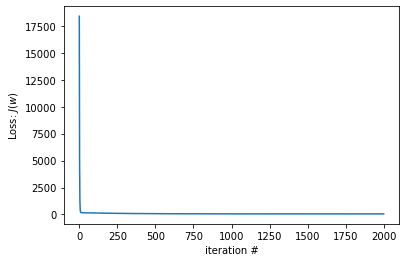

In [39]:
w, err_all, w_all = gradient_descent(X_train_with_dummy, y_train, lr = 0.0001, num_epochs=2000)
plot_learning_curves(err_all)

## Learning rate and convergence

### Varying the learning rate:

Let's vary the learning rate and observe the change in convergence characteristics of GD.

We will use:
- $\alpha \in \{1e-6, 1e-4, 1e-1\}$ to run GD for $2000$ epochs each.
- Compare the convergence characteristics.


Iteration #: 0, loss: 18395.39
Iteration #: 100, loss: 10322.89
Iteration #: 200, loss: 5824.80
Iteration #: 300, loss: 3318.34
Iteration #: 400, loss: 1921.60
Iteration #: 500, loss: 1143.18
Iteration #: 600, loss: 709.28
Iteration #: 700, loss: 467.34
Iteration #: 800, loss: 332.37
Iteration #: 900, loss: 257.00
Iteration #: 1000, loss: 214.83
Iteration #: 1100, loss: 191.17
Iteration #: 1200, loss: 177.82
Iteration #: 1300, loss: 170.21
Iteration #: 1400, loss: 165.81
Iteration #: 1500, loss: 163.19
Iteration #: 1600, loss: 161.57
Iteration #: 1700, loss: 160.50
Iteration #: 1800, loss: 159.74
Iteration #: 1900, loss: 159.15


Text(0.5, 1.0, 'lr = 1e-6')

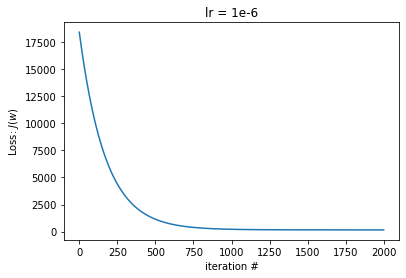

In [40]:
w, err_all, w_all = gradient_descent(X_train_with_dummy, y_train, lr = 1e-6, num_epochs=2000)
plot_learning_curves(err_all)
plt.title('lr = 1e-6')


Iteration #: 0, loss: 18395.39
Iteration #: 100, loss: 132.63
Iteration #: 200, loss: 108.64
Iteration #: 300, loss: 91.47
Iteration #: 400, loss: 79.17
Iteration #: 500, loss: 70.36
Iteration #: 600, loss: 64.06
Iteration #: 700, loss: 59.55
Iteration #: 800, loss: 56.31
Iteration #: 900, loss: 54.00
Iteration #: 1000, loss: 52.34
Iteration #: 1100, loss: 51.16
Iteration #: 1200, loss: 50.31
Iteration #: 1300, loss: 49.70
Iteration #: 1400, loss: 49.26
Iteration #: 1500, loss: 48.95
Iteration #: 1600, loss: 48.73
Iteration #: 1700, loss: 48.57
Iteration #: 1800, loss: 48.45
Iteration #: 1900, loss: 48.37


Text(0.5, 1.0, 'lr = 1e-4')

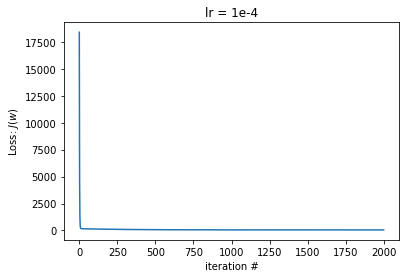

In [41]:
w, err_all, w_all = gradient_descent(X_train_with_dummy, y_train, lr = 1e-4, num_epochs=2000)
plot_learning_curves(err_all)
plt.title('lr = 1e-4')


Iteration #: 0, loss: 18395.39
Iteration #: 100, loss:  inf
Iteration #: 200, loss:  nan
Iteration #: 300, loss:  nan
Iteration #: 400, loss:  nan
Iteration #: 500, loss:  nan
Iteration #: 600, loss:  nan
Iteration #: 700, loss:  nan
Iteration #: 800, loss:  nan
Iteration #: 900, loss:  nan
Iteration #: 1000, loss:  nan
Iteration #: 1100, loss:  nan
Iteration #: 1200, loss:  nan
Iteration #: 1300, loss:  nan
Iteration #: 1400, loss:  nan
Iteration #: 1500, loss:  nan
Iteration #: 1600, loss:  nan
Iteration #: 1700, loss:  nan
Iteration #: 1800, loss:  nan
Iteration #: 1900, loss:  nan


<ipython-input-29-2d648cb62e04>:13: RuntimeWarning: overflow encountered in matmul
  return (1/2)*(np.transpose(e)@e)
<ipython-input-30-8b51e59d7870>:12: RuntimeWarning: overflow encountered in matmul
  return np.transpose(X)@(predict(X,w)-y)
<ipython-input-32-adba0fd1677f>:15: RuntimeWarning: invalid value encountered in subtract
  return (w - lr*grad)


Text(0.5, 1.0, 'lr = 1e-1')

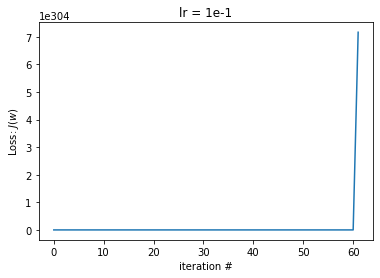

In [42]:
w, err_all, w_all = gradient_descent(X_train_with_dummy, y_train, lr = 1e-1, num_epochs=2000)
plot_learning_curves(err_all)
plt.title('lr = 1e-1')

### Varying the no. of epochs:

Let's vary the no. of epochs and observe the change in convergence characteristics of GD.

We will use:
- We will use epochs $\in \{1e+1, 1e+2, 1e+3, 1e+5\}$ to run GD for a fixed learning rate $1e-5$.
- Compare the convergence characteristics.


Iteration #: 0, loss: 18395.39


Text(0.5, 1.0, '# iterations = 1e+1')

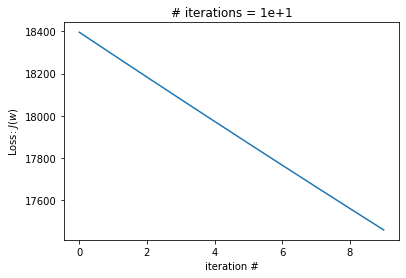

In [44]:
w, err_all, w_all = gradient_descent(X_train_with_dummy, y_train, lr = 1e-6, num_epochs=1e+1)
plot_learning_curves(err_all)
plt.title('# iterations = 1e+1')


Iteration #: 0, loss: 18395.39


Text(0.5, 1.0, '# iterations = 1e+2')

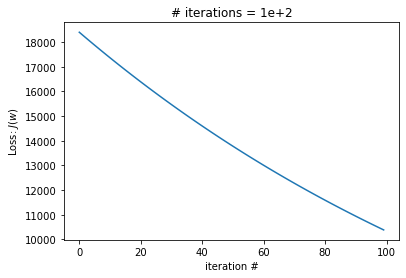

In [45]:
w, err_all, w_all = gradient_descent(X_train_with_dummy, y_train, lr = 1e-6, num_epochs=1e+2)
plot_learning_curves(err_all)
plt.title('# iterations = 1e+2')


Iteration #: 0, loss: 18395.39
Iteration #: 100, loss: 10322.89
Iteration #: 200, loss: 5824.80
Iteration #: 300, loss: 3318.34
Iteration #: 400, loss: 1921.60
Iteration #: 500, loss: 1143.18
Iteration #: 600, loss: 709.28
Iteration #: 700, loss: 467.34
Iteration #: 800, loss: 332.37
Iteration #: 900, loss: 257.00


Text(0.5, 1.0, '# iterations = 1e+3')

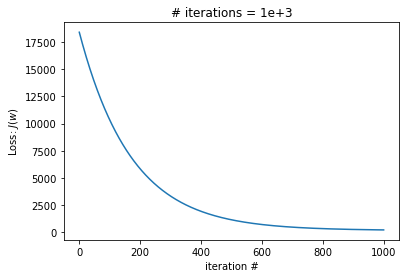

In [46]:
w, err_all, w_all = gradient_descent(X_train_with_dummy, y_train, lr = 1e-6, num_epochs=1e+3)
plot_learning_curves(err_all)
plt.title('# iterations = 1e+3')


Iteration #: 0, loss: 18395.39
Iteration #: 100, loss: 10322.89
Iteration #: 200, loss: 5824.80
Iteration #: 300, loss: 3318.34
Iteration #: 400, loss: 1921.60
Iteration #: 500, loss: 1143.18
Iteration #: 600, loss: 709.28
Iteration #: 700, loss: 467.34
Iteration #: 800, loss: 332.37
Iteration #: 900, loss: 257.00
Iteration #: 1000, loss: 214.83
Iteration #: 1100, loss: 191.17
Iteration #: 1200, loss: 177.82
Iteration #: 1300, loss: 170.21
Iteration #: 1400, loss: 165.81
Iteration #: 1500, loss: 163.19
Iteration #: 1600, loss: 161.57
Iteration #: 1700, loss: 160.50
Iteration #: 1800, loss: 159.74
Iteration #: 1900, loss: 159.15
Iteration #: 2000, loss: 158.66
Iteration #: 2100, loss: 158.23
Iteration #: 2200, loss: 157.82
Iteration #: 2300, loss: 157.44
Iteration #: 2400, loss: 157.06
Iteration #: 2500, loss: 156.69
Iteration #: 2600, loss: 156.33
Iteration #: 2700, loss: 155.96
Iteration #: 2800, loss: 155.60
Iteration #: 2900, loss: 155.24
Iteration #: 3000, loss: 154.89
Iteration #

Text(0.5, 1.0, '# iterations = 1e+5')

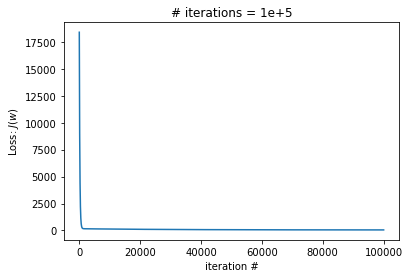

In [47]:
w, err_all, w_all = gradient_descent(X_train_with_dummy, y_train, lr = 1e-6, num_epochs=1e+5)
plot_learning_curves(err_all)
plt.title('# iterations = 1e+5')

## Weight convergence criterion

We can also implement weight convergence criterion to stop gradient descent procedure in the following way:

- Store weight vectors of past $r$ iterations.
- Check if there is a change in the weight vector $\ge \epsilon$, else terminate the gradient descent procedure.

Infact, implementing *Weight convergence criterion* and *limiting # of iterations* together helps attain convergence faster.

# Optimization - Variations of GD (mini-batch and stochastic)

The objective of this section is to implement minibatch and stochastic gradient descent.

## Mini-batch Gradient Descent (MBGD)

The key idea here is to perform weight updates by computing gradient on batches of small number of examples.

For MBGD and SGD, we need a function for defining a learning schedule. The learning schedule gradually decreases the learning rate of both these variations. We initially start with a larger learning rate, which the learning schedule gradually decreases as we make iterations through these procedures.

In [48]:
t0, t1 = 200, 1e+5

def learning_schedule(t):
    return t0 / (t+t1)

In [66]:
def mini_batch_gd(X:np.ndarray, y:np.ndarray, 
num_epochs:int, minibatch_size:int):
    '''Estimates parameters of linar regression model through mini-batch gradient descent.
    
    Args:
        X: Feature matrix for training data of shape (n, m+1)
        y: Output label for training data vector of shape (n,)
        num_epochs: No. of epochs (no. of times MBGD is done over the whole training set)
        minibatch_size: Size of each mini-batch, after which we update the weights
    
    Returns:
        Weight vector: Final weight vector
        Error vector across different iterations
        Weight vectors across different iterations
    '''

    w_all = [] # all parameters across iterations.
    err_all = [] # all errors across iterations.

    # Parameter vector (weight vector) initialized to [0,0]
    w = np.zeros((X.shape[1]))
    t = 0

    for epoch in range(num_epochs):
        shuffled_indices = np.random.permutation(X.shape[0])
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, X.shape[0], minibatch_size):
            t += 1
            
            # ith mini-batch
            Xi = X_shuffled[i:i + minibatch_size]
            yi = y_shuffled[i:i + minibatch_size]

            err_all.append(loss(Xi, yi, w))

            gradients = (2/ minibatch_size) * calculate_gradient(Xi, yi, w)

            lr = learning_schedule(t)

            # Print stats every 10 epochs
            if (epoch%10) == 0 and i == 0:
                print('For mini-batch size = %d : \n Epoch #: %d, loss: %4.2f'%(minibatch_size, epoch, err_all[-1]))

            w = update_weights(w, gradients, lr)
            w_all.append(w)
    
    print('Final Loss:', err_all[-1], '\n Final Weights:', w)
    return w, err_all, w_all

### Learning Curves

Let's look at the learning curves for MBGD.

For mini-batch size = 8 : 
 Epoch #: 0, loss: 1375.14
For mini-batch size = 8 : 
 Epoch #: 10, loss: 15.81
Final Loss: 15.604400176651607 
 Final Weights: [1.10177019 3.40392684]


Text(0.5, 1.0, 'Learning curves of MBGD')

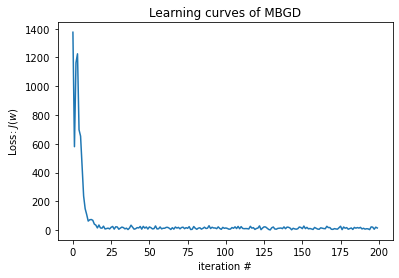

In [67]:
w, err_all, w_all = mini_batch_gd(X_train_with_dummy, y_train, 20, 8)
plot_learning_curves(err_all)
plt.title('Learning curves of MBGD')

Let's change the batch size in MBGD and observe its convergence characteristics.

- We test with batch-sizes of $\{1,2,4,16,32,64\}$.

For mini-batch size = 1 : 
 Epoch #: 0, loss: 85.61
For mini-batch size = 1 : 
 Epoch #: 10, loss: 0.00
For mini-batch size = 1 : 
 Epoch #: 20, loss: 0.00
For mini-batch size = 1 : 
 Epoch #: 30, loss: 1.20
For mini-batch size = 1 : 
 Epoch #: 40, loss: 0.09
For mini-batch size = 1 : 
 Epoch #: 50, loss: 0.05
For mini-batch size = 1 : 
 Epoch #: 60, loss: 0.24
For mini-batch size = 1 : 
 Epoch #: 70, loss: 0.22
For mini-batch size = 1 : 
 Epoch #: 80, loss: 0.05
For mini-batch size = 1 : 
 Epoch #: 90, loss: 0.05
For mini-batch size = 2 : 
 Epoch #: 0, loss: 1003.11
For mini-batch size = 2 : 
 Epoch #: 10, loss: 4.50
For mini-batch size = 2 : 
 Epoch #: 20, loss: 1.08
For mini-batch size = 2 : 
 Epoch #: 30, loss: 0.55
For mini-batch size = 2 : 
 Epoch #: 40, loss: 2.88
For mini-batch size = 2 : 
 Epoch #: 50, loss: 0.54
For mini-batch size = 2 : 
 Epoch #: 60, loss: 0.44
For mini-batch size = 2 : 
 Epoch #: 70, loss: 0.06
For mini-batch size = 2 : 
 Epoch #: 80, loss: 0.16
For mini-b

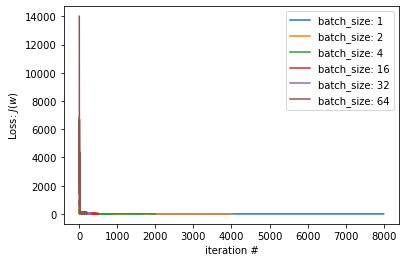

In [59]:
batch_sizes = [1,2,4,16,32,64]
mbgd_stats = {}

for batch_size in batch_sizes:
    w, err_all, w_all = mini_batch_gd(X_train_with_dummy, y_train, 100, batch_size)
    mbgd_stats[batch_size] = err_all
    legend = 'batch_size: %d' %batch_size
    plt.plot(err_all, label=legend)

plt.xlabel('iteration #')
plt.ylabel('Loss: $J(w)$')
plt.legend()

## Stochastic Gradient Descent (SGD)

The key idea here is to perform weight updates byy computing gradients on one example at a time.

It is infact MBGD with number of example per batch = 1.

In [68]:
def sgd(X:np.ndarray, y:np.ndarray, num_epochs:int):
    '''Estimates parameters of linar regression model through stochastic gradient descent.
    
    Args:
        X: Feature matrix for training data of shape (n, m+1)
        y: Output label for training data vector of shape (n,)
        num_epochs: No. of epochs (no. of times MBGD is done over the whole training set)
    
    Returns:
        Weight vector: Final weight vector
        Error vector across different iterations
        Weight vectors across different iterations
    '''

    w_all = [] # all parameters across iterations.
    err_all = [] # all errors across iterations.

    # Parameter vector (weight vector) initialized to [0,0]
    w = np.zeros((X.shape[1]))
    t = 0

    for epoch in range(num_epochs):
        for i in range(X.shape[0]):
            random_index = np.random.randint(X.shape[0])
            
            # ith iteration of an epoch
            Xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            err_all.append(loss(Xi, yi, w))

            gradients = 2 * calculate_gradient(Xi, yi, w)

            lr = learning_schedule(epoch * X.shape[0] + i)

            # Print stats every 10 epochs
            if (epoch%10) == 0 and i == 0:
                print('Epoch #: %d, loss: %4.2f'%(epoch, err_all[-1]))

            w = update_weights(w, gradients, lr)
            w_all.append(w)
    
    print('Final Loss:', err_all[-1], '\n Final Weights:', w)
    return w, err_all, w_all

### Learning Curves

Let's look at the learning curve for SGD.

Epoch #: 0, loss: 174.17
Final Loss: 1.8825468120826372 
 Final Weights: [2.34202135 3.14978351]


Text(0.5, 1.0, 'Learning curves of SGD')

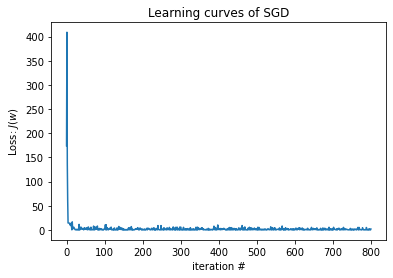

In [69]:
w, err_all, w_all = sgd(X_train_with_dummy, y_train, 10)
plot_learning_curves(err_all)
plt.title('Learning curves of SGD')

The combined model can be found at [Linear_Regression_(combined).ipynb](file:///Users/sampadk04/Desktop/Programming/VSCode-Projects/Python/IITM/IITM-MLT/W2_Linear_Regression/Linear_Regression_(combined).ipynb)